1. Prepare features and Target
2. Split into train test split
3. Train models
4. Evaluate models
5. Compare matrix and select the best model
6. Save the model using joblib or pickle

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('resampled_training_data.csv')
df.head(3)

,carbohydrates,cholesterol,energy,fat,fiber,proteins,salt,saturated-fat,sodium,sugars,nutriscore,nova_group
0,21.43,0.00,2540.0,47.625,7.25,21.43,1.3400,3.57,0.5360,7.14,11.0,4.0
1,13.33,0.02,1117.0,20.000,0.00,10.00,3.6895,8.33,1.4758,10.00,18.0,4.0
2,6.67,0.02,1393.0,33.330,0.00,0.00,1.8325,3.33,0.7330,0.00,15.0,4.0


In [4]:
# Check correlation of features with target
df.corr()['nova_group'].sort_values(ascending=False)

nova_group       1.000000
nutriscore       0.925880
saturated-fat    0.478551
sugars           0.427458
energy           0.394348
salt             0.364843
sodium           0.364841
fat              0.340163
carbohydrates    0.266213
cholesterol      0.149675
proteins        -0.004868
fiber           -0.137298
Name: nova_group, dtype: float64

In [8]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 2: Read the cleaned CSV file
df = pd.read_csv('resampled_training_data.csv')

# Step 3: Define features (X) and target (y)
# Assume 'nova_group' is the target column
X = df.drop(columns=['nutriscore','nova_group'])   # All columns except target
y = df['nova_group']                  # Target column
print(X.shape[1])

# Step 4: Perform Stratified Sampling to get 50,000 balanced rows
X_sample, _, y_sample, _ = train_test_split(
    X,
    y,
    train_size=50000,
    stratify=y,
    random_state=42
)

# Step 5: Combine sampled features and target back into one DataFrame
df_sampled = pd.concat([X_sample, y_sample], axis=1)

# Optional: Save sampled data to a new CSV (if needed)
df_sampled.to_csv('stratified_sampled_nova_data.csv', index=False)

# Final Output
print("Sampled Data Shape:", df_sampled.shape)
print("Class Distribution in Sample:\n", y_sample.value_counts(normalize=True))



10
Sampled Data Shape: (50000, 11)
Class Distribution in Sample:
 nova_group
3.0    0.25
4.0    0.25
1.0    0.25
2.0    0.25
Name: proportion, dtype: float64


In [39]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Initialize models
rf = RandomForestClassifier(random_state=42)


# Fit models
rf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [41]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

In [43]:
from sklearn.metrics import classification_report

models = {
    "Random Forest": rf,
    "Gradient Boosting": gb,
    }

for name, model in models.items():
    print(f"\n{name} Evaluation Report:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))



Random Forest Evaluation Report:
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95     17676
         2.0       0.92      0.94      0.93     17676
         3.0       0.92      0.94      0.93     17677
         4.0       0.96      0.91      0.94     17676

    accuracy                           0.94     70705
   macro avg       0.94      0.94      0.94     70705
weighted avg       0.94      0.94      0.94     70705


Gradient Boosting Evaluation Report:
              precision    recall  f1-score   support

         1.0       0.89      0.86      0.87     17676
         2.0       0.77      0.79      0.78     17676
         3.0       0.76      0.81      0.78     17677
         4.0       0.89      0.83      0.86     17676

    accuracy                           0.82     70705
   macro avg       0.83      0.82      0.82     70705
weighted avg       0.83      0.82      0.82     70705



In [49]:
from sklearn.metrics import classification_report
import pandas as pd

models = {
    "Random Forest": rf,
    "Gradient Boosting": gb,
}

for name, model in models.items():
    print(f"\n📊 {name} Evaluation Report:")

    y_pred = model.predict(X_test)
    
    # Convert classification report to dict
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    
    # Convert to DataFrame
    df_report = pd.DataFrame(report_dict).transpose()
    
    # Round for neatness
    print(df_report.round(2))



📊 Random Forest Evaluation Report:
              precision  recall  f1-score   support
1.0                0.95    0.96      0.95  17676.00
2.0                0.92    0.94      0.93  17676.00
3.0                0.92    0.94      0.93  17677.00
4.0                0.96    0.91      0.94  17676.00
accuracy           0.94    0.94      0.94      0.94
macro avg          0.94    0.94      0.94  70705.00
weighted avg       0.94    0.94      0.94  70705.00

📊 Gradient Boosting Evaluation Report:
              precision  recall  f1-score   support
1.0                0.89    0.86      0.87  17676.00
2.0                0.77    0.79      0.78  17676.00
3.0                0.76    0.81      0.78  17677.00
4.0                0.89    0.83      0.86  17676.00
accuracy           0.82    0.82      0.82      0.82
macro avg          0.83    0.82      0.82  70705.00
weighted avg       0.83    0.82      0.82  70705.00


In [51]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define class labels
labels = sorted(y_test.unique())  # Automatically sorted class labels

# Loop through each model and display confusion matrix
for name, model in models.items():
    print(f"\n🔢 Confusion Matrix for {name}:\n")

    y_pred = model.predict(X_test)
    
    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    
    # Convert to DataFrame for better formatting
    cm_df = pd.DataFrame(cm, index=[f"Actual {label}" for label in labels],
                            columns=[f"Predicted {label}" for label in labels])
    
    print(cm_df)




🔢 Confusion Matrix for Random Forest:

            Predicted 1.0  Predicted 2.0  Predicted 3.0  Predicted 4.0
Actual 1.0          16914            519            164             79
Actual 2.0            448          16653            423            152
Actual 3.0            152            418          16635            472
Actual 4.0            284            483            767          16142

🔢 Confusion Matrix for Gradient Boosting:

            Predicted 1.0  Predicted 2.0  Predicted 3.0  Predicted 4.0
Actual 1.0          15188           1749            639            100
Actual 2.0           1192          13967           2154            363
Actual 3.0            413           1674          14263           1327
Actual 4.0            353            811           1760          14752


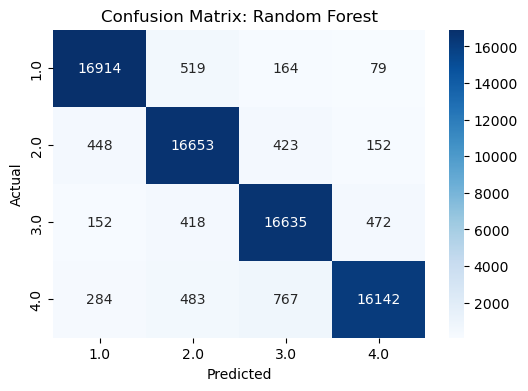

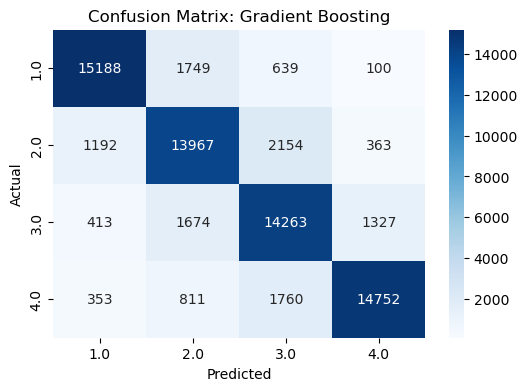

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [57]:
len(X_test)

70705

In [63]:
import joblib
import pickle

# Assuming your model variable is named `rf`
# Save using joblib
joblib.dump(rf, "random_forest_model.joblib")

# Save using pickle
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("✅ Random Forest model saved as 'random_forest_model.joblib' and 'random_forest_model.pkl'")


✅ Random Forest model saved as 'random_forest_model.joblib' and 'random_forest_model.pkl'


In [65]:
# Load the model
rf_model = joblib.load("random_forest_model.joblib")

# Example prediction
# predictions = rf_model.predict(X_test)


In [67]:
# Load the model
with open("random_forest_model.pkl", "rb") as f:
    rf_model = pickle.load(f)

# Example prediction
# predictions = rf_model.predict(X_test)
